About Dataset
Hass avocado is a popular variety of avocado known for its distinctive pebbly, dark green to black skin and creamy, buttery flesh when ripe. It's a large fruit, and is the most common commercial variety globally.

A synthetic dataset simulating measurements designed for a classification task in predicting avocado ripeness stages using physical characteristics.

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

GETTING DATA SET UP

In [11]:
dataframe=pd.read_csv("avocado_ripeness_dataset.csv")

print("shape of dataframe:")
print(dataframe.shape)
print("Some small samples of dataframe :")
print(dataframe.sample(frac=0.01))
print(dataframe.info())
print(dataframe.describe())

shape of dataframe:
(250, 9)
Some small samples of dataframe :
    firmness  hue  saturation  brightness color_category  sound_db  weight_g  \
14      28.3  307          50          52         purple        45       184   
65      55.8  295          74          51         purple        58       228   

    size_cm3   ripeness  
14       236  firm-ripe  
65       192   breaking  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1),

DATA PREPARATION

In [20]:
print("Checking for missed values:")
print(dataframe.isna().sum())
print("Checking duplicates :")
print(dataframe.duplicated().sum())
print(dataframe.info())

Checking for missed values:
firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64
Checking duplicates :
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB
None


UNI-VARIATE ANALYSIS

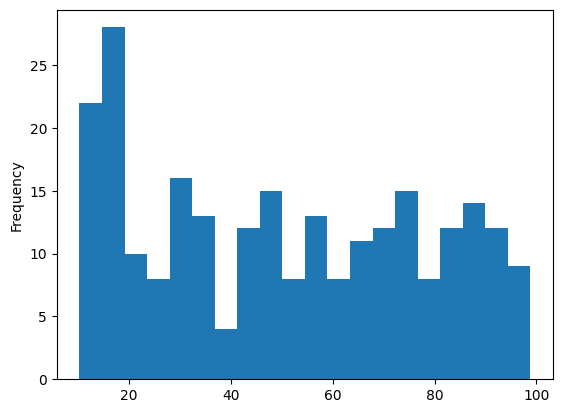

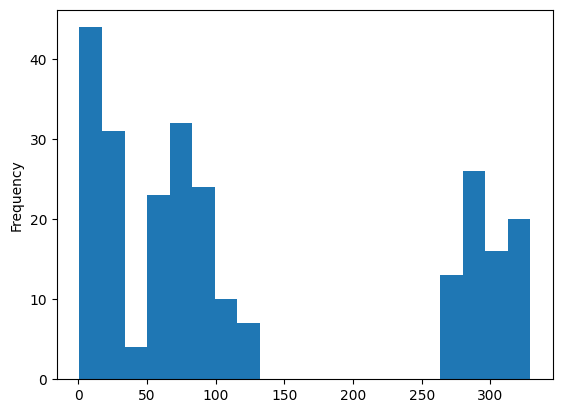

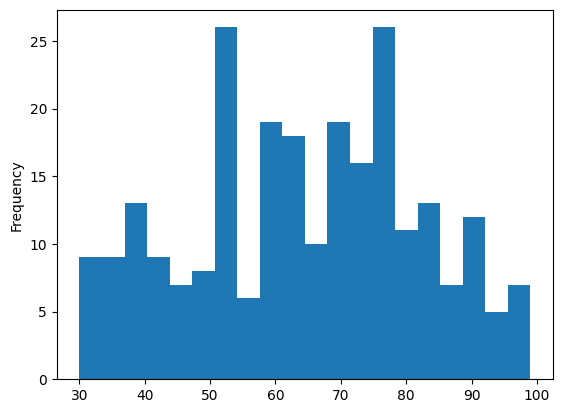

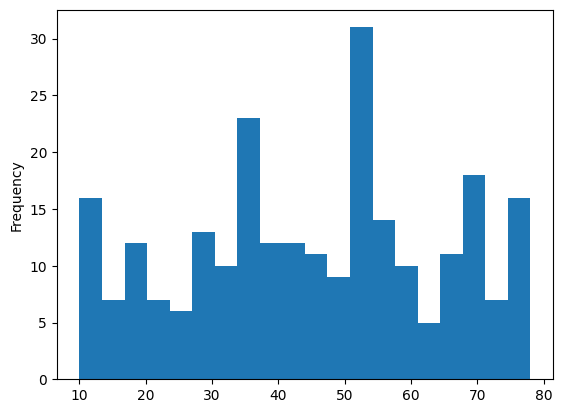

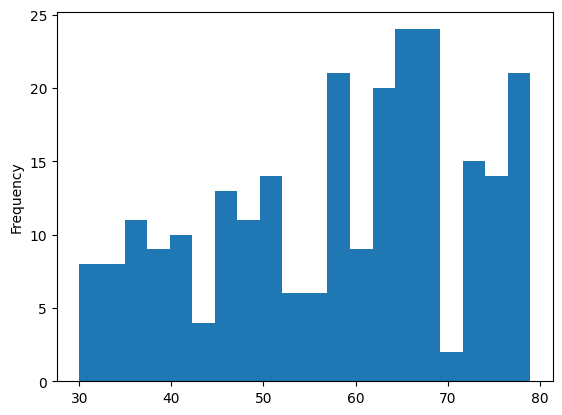

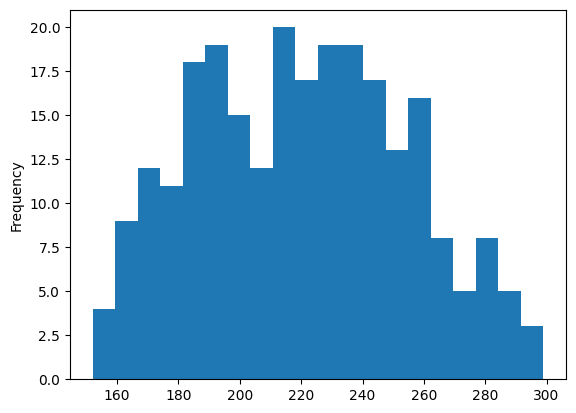

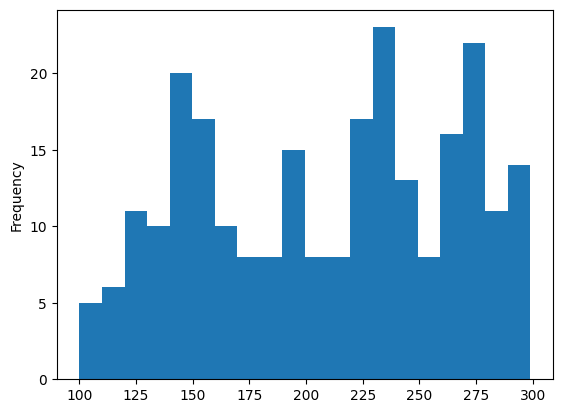

In [38]:
for i,col in enumerate(iter(dataframe.columns)):
                if(dataframe[col].dtype==object):
                        continue
                dataframe[col].plot(kind="hist",bins=20)
                plt.show()

DATA VISUALISATION

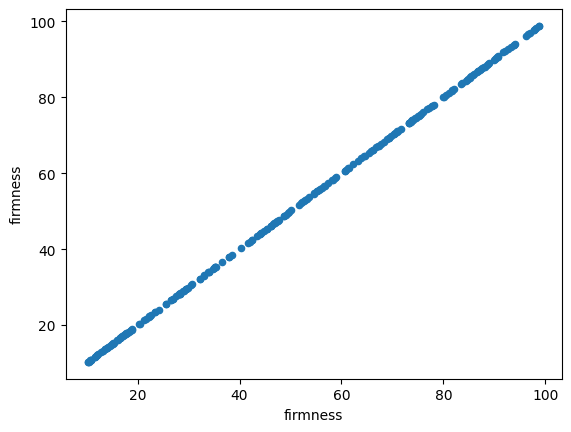

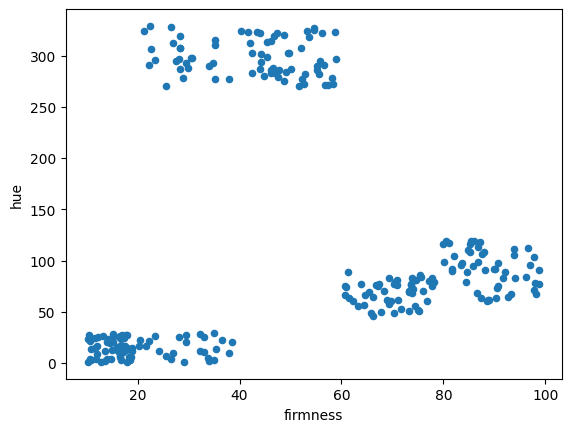

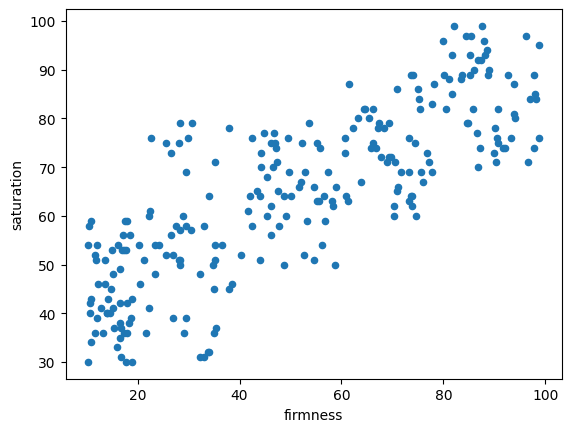

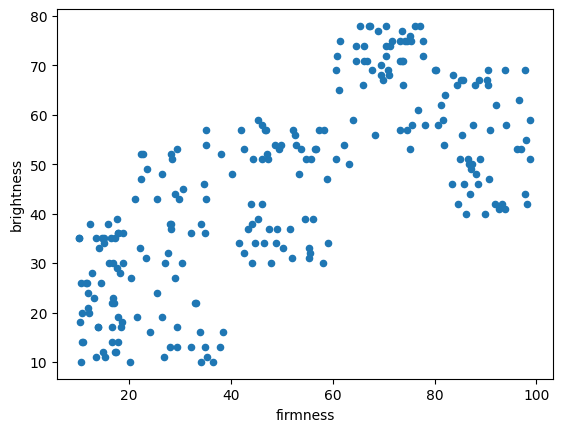

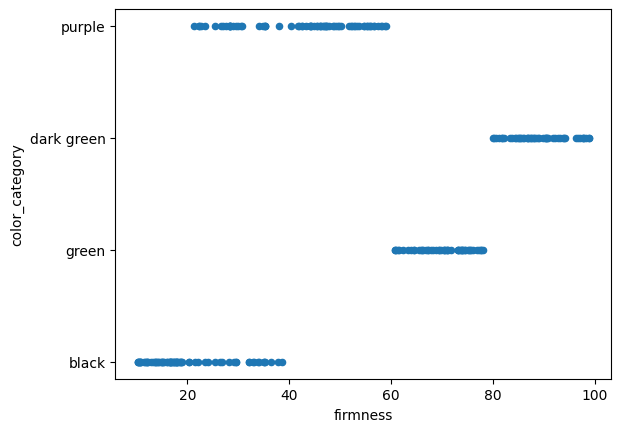

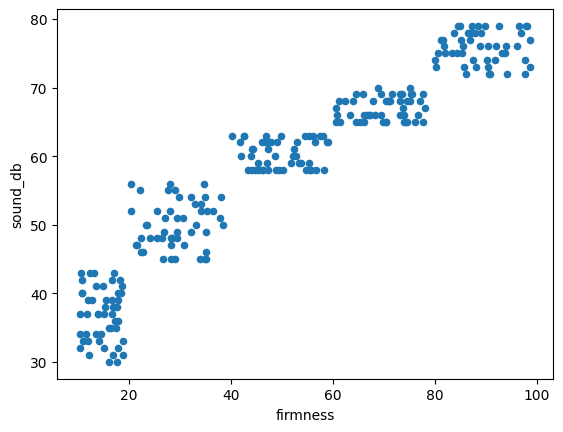

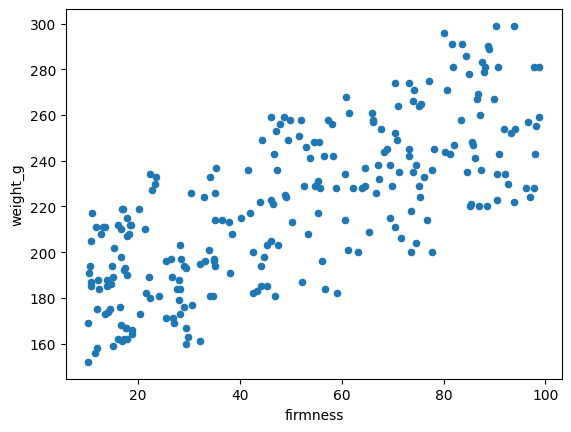

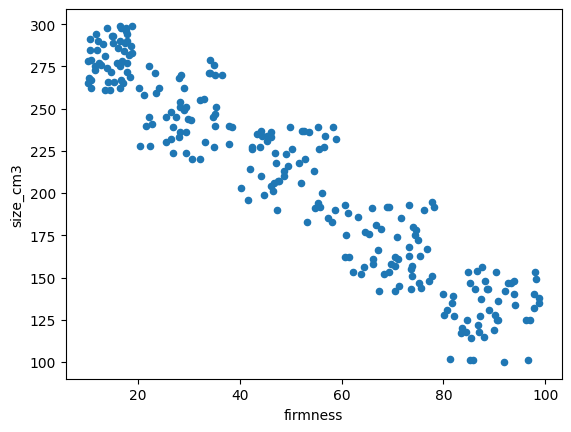

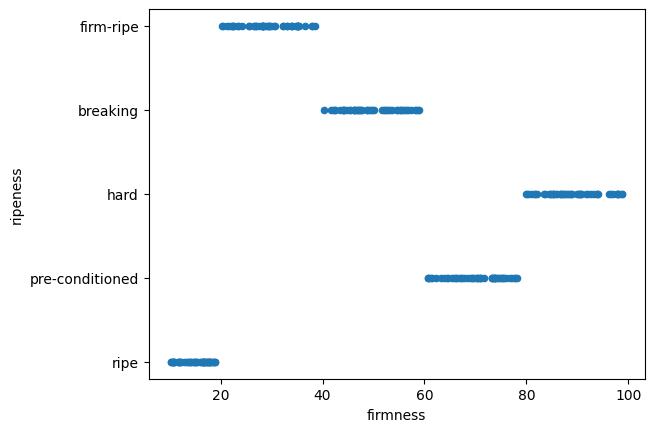

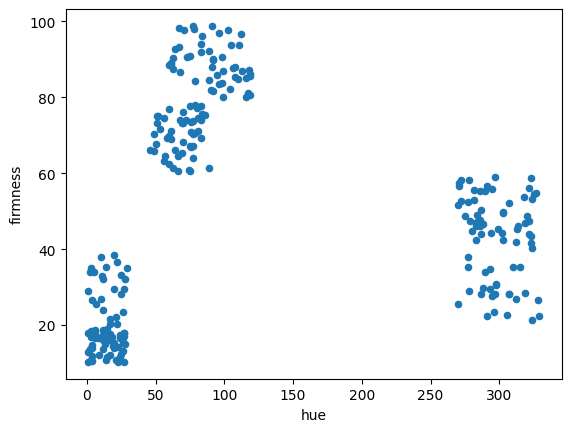

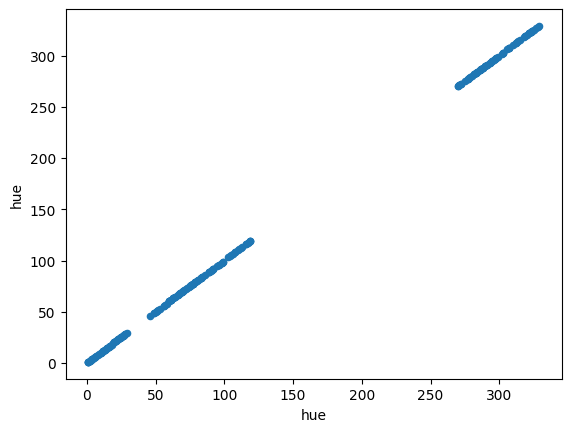

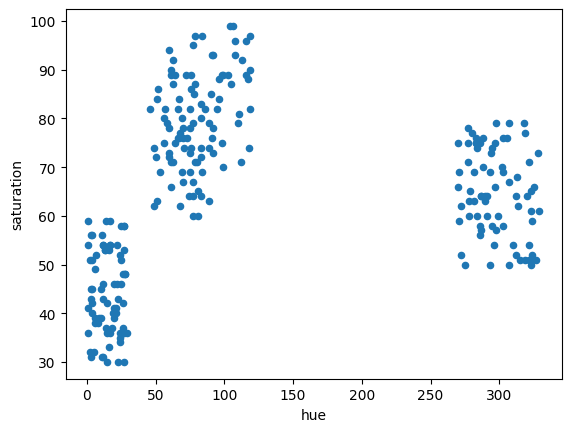

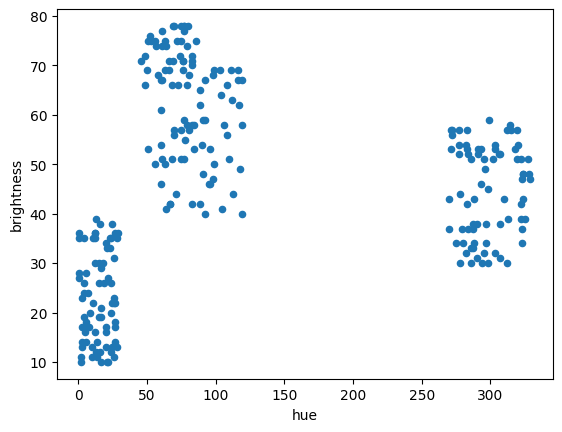

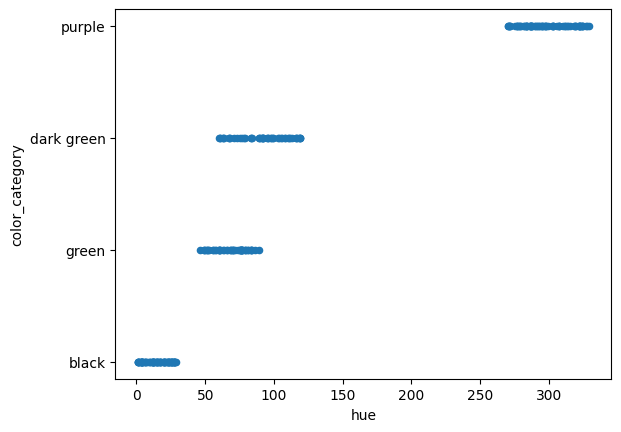

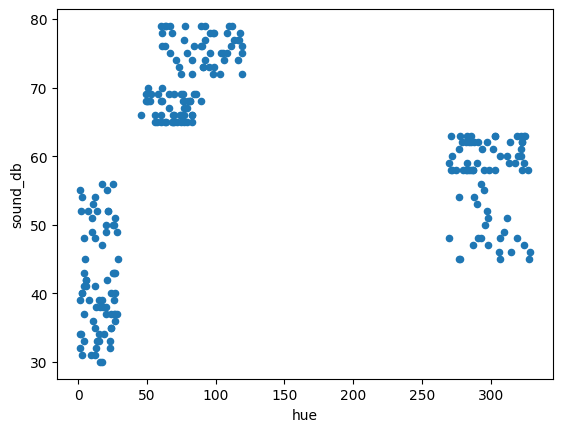

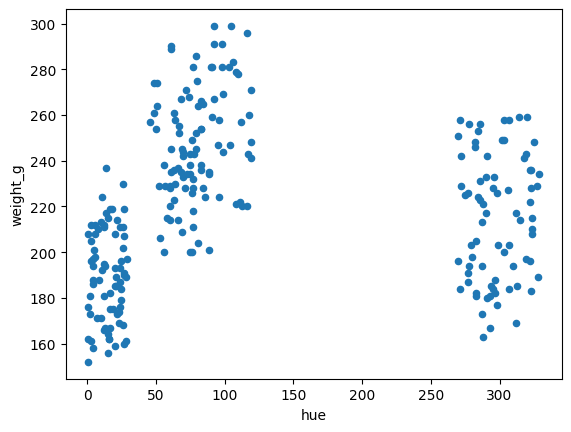

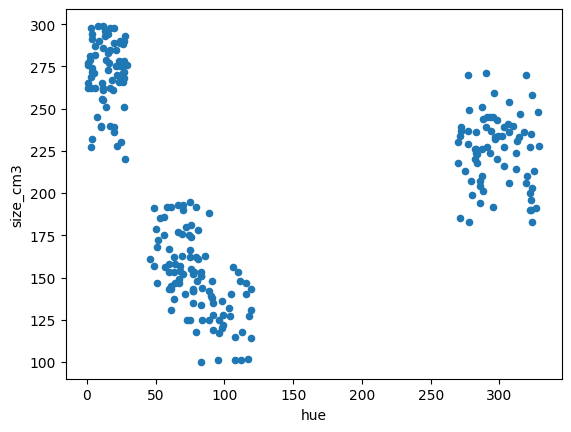

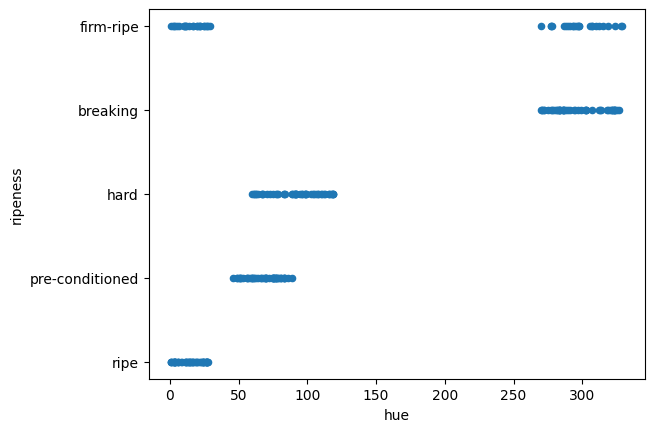

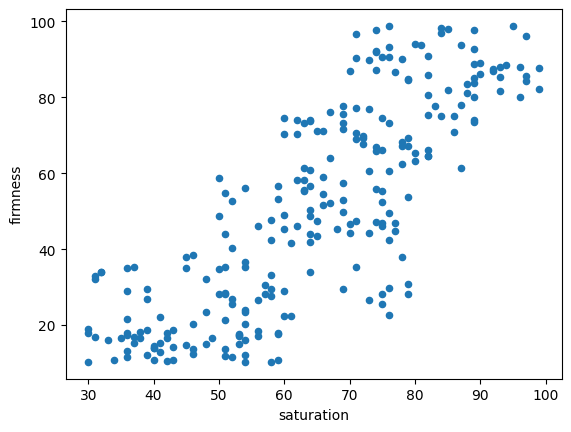

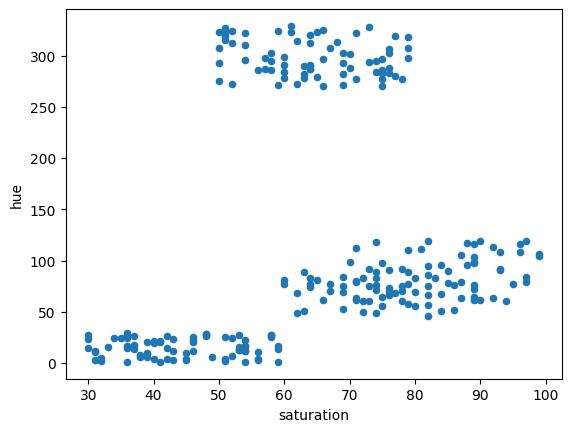

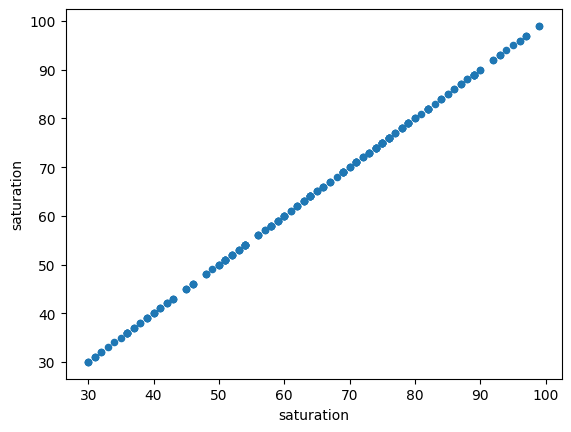

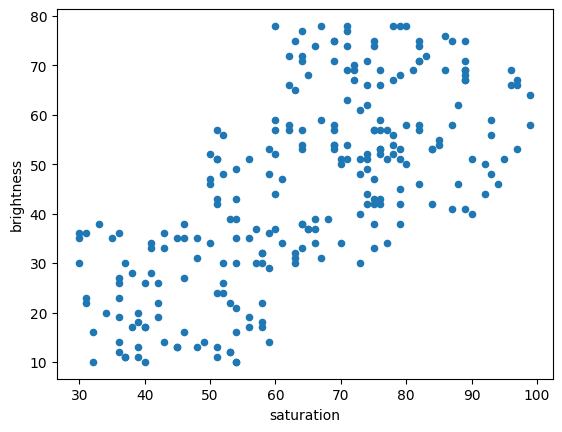

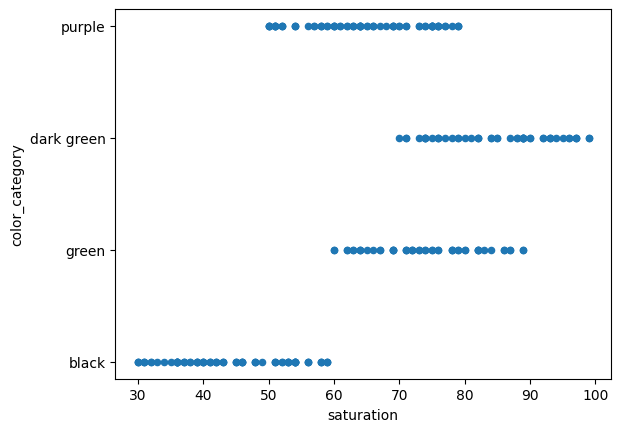

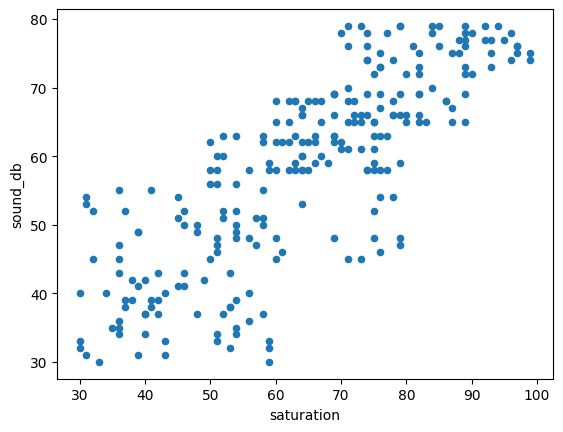

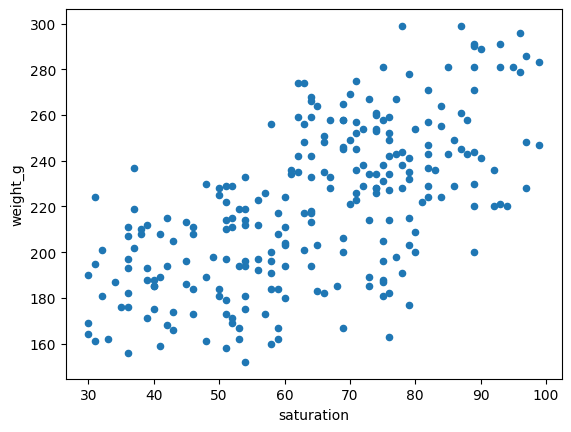

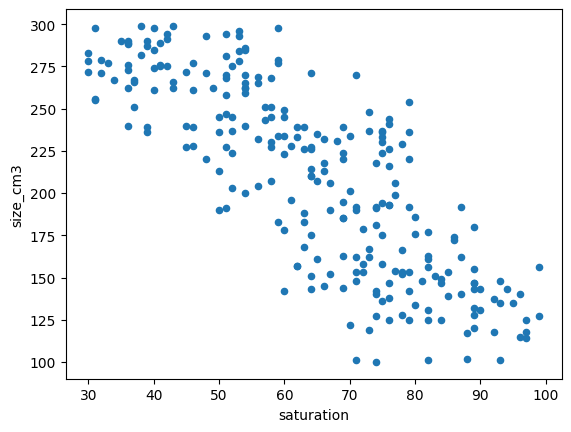

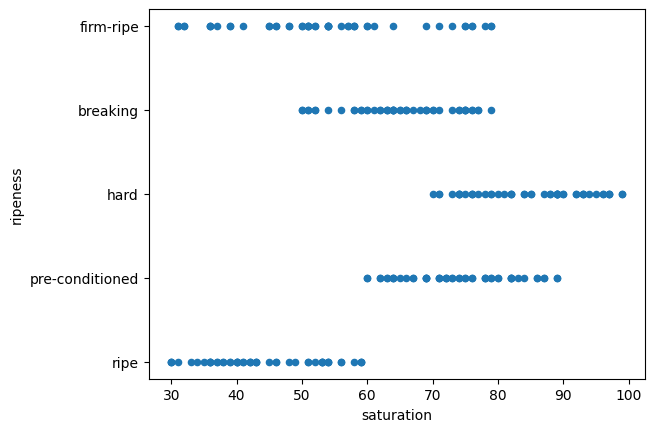

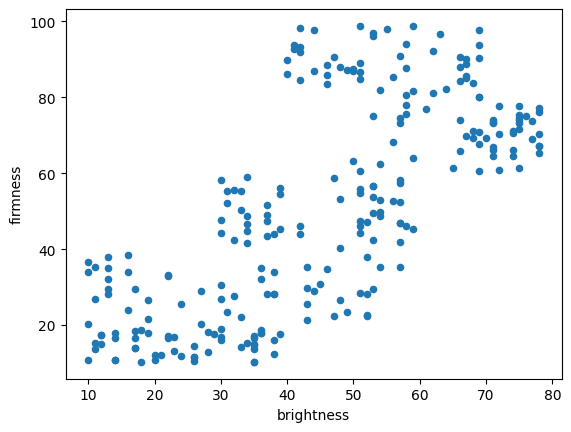

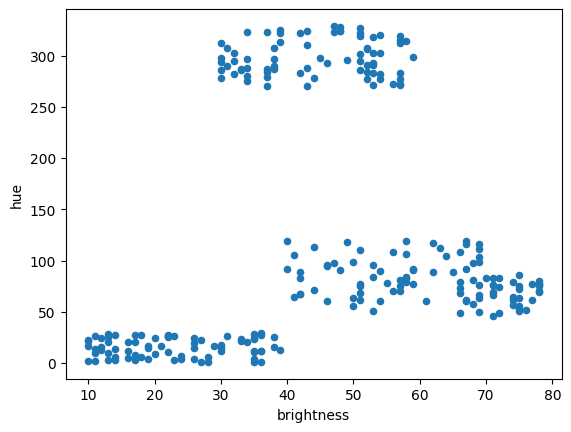

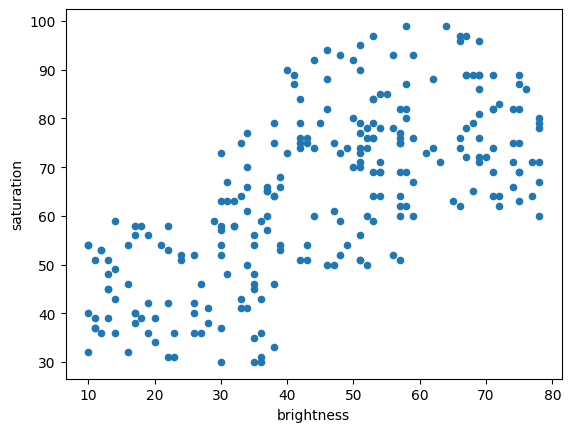

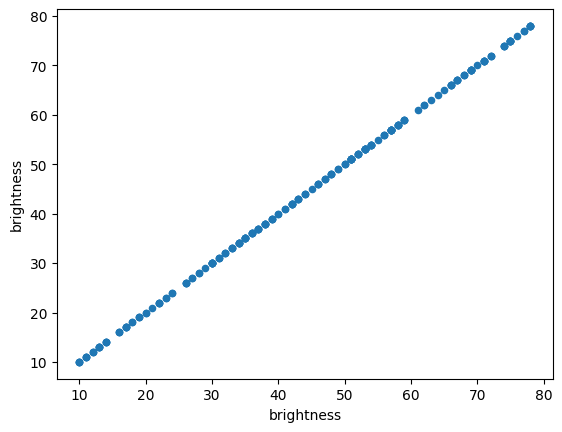

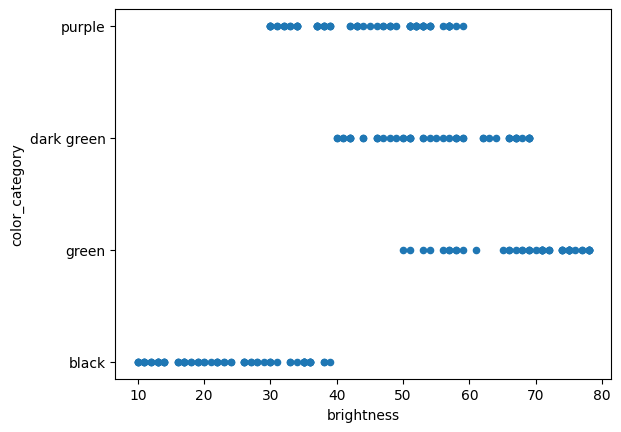

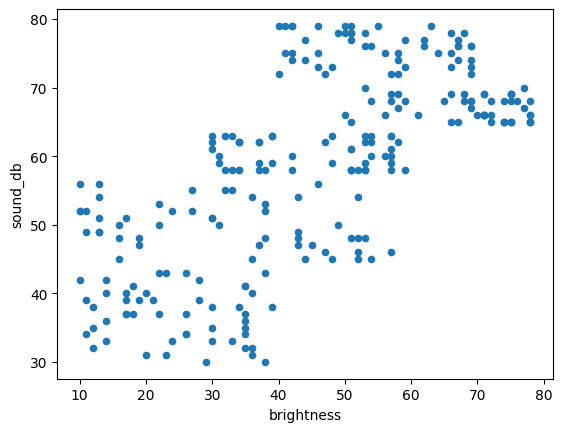

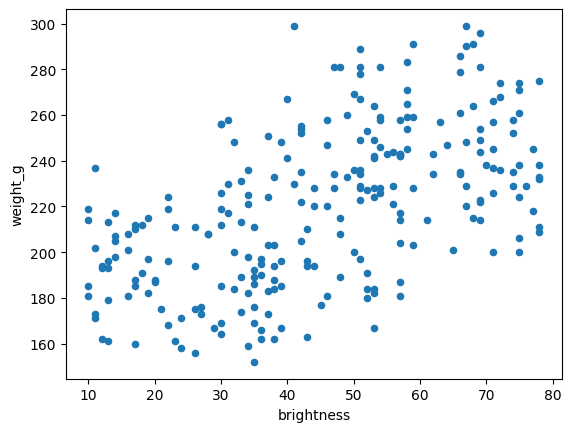

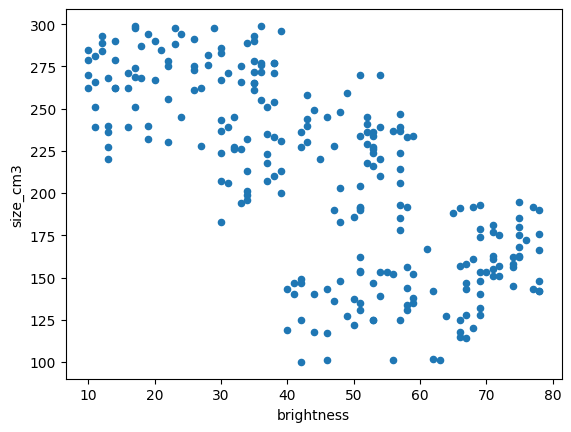

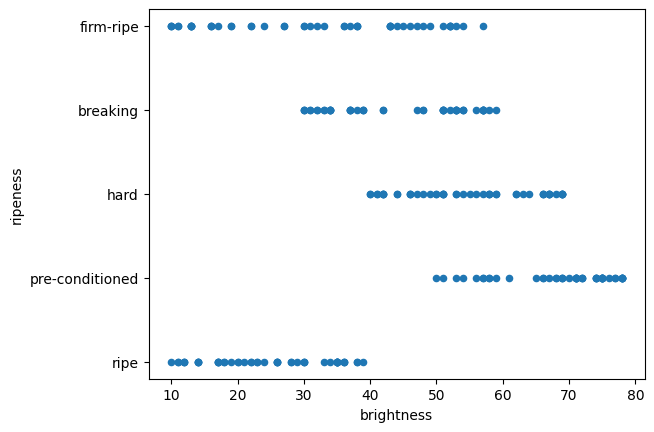

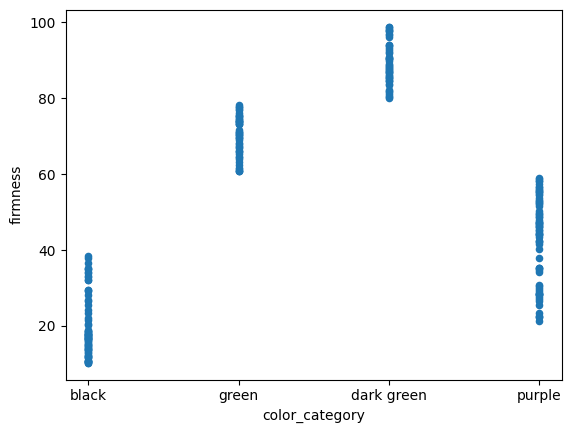

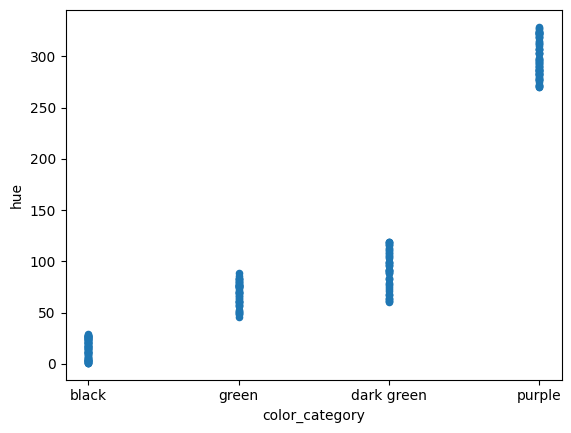

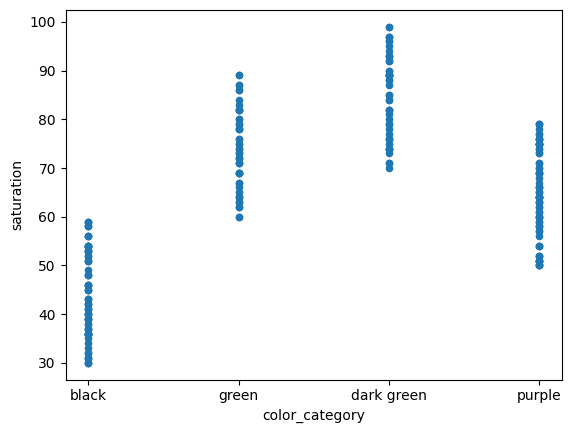

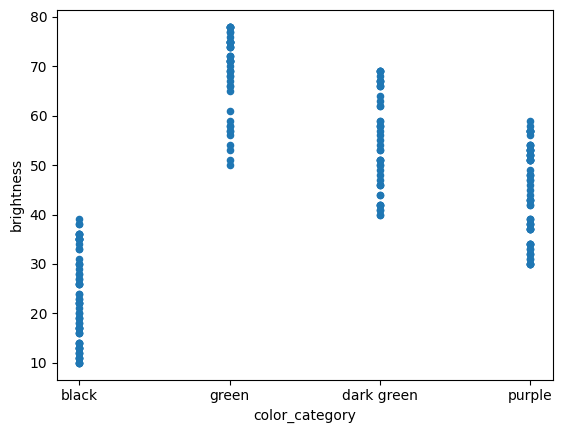

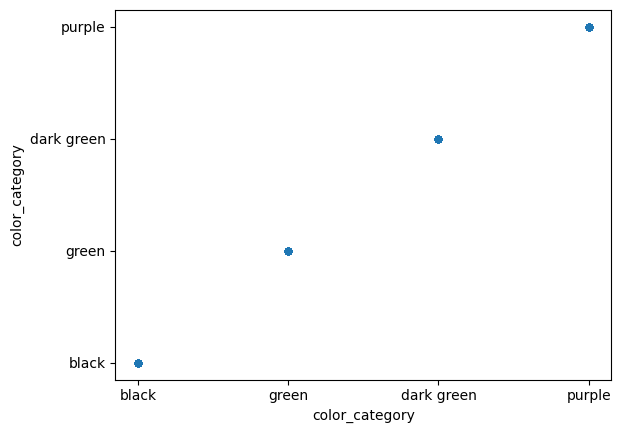

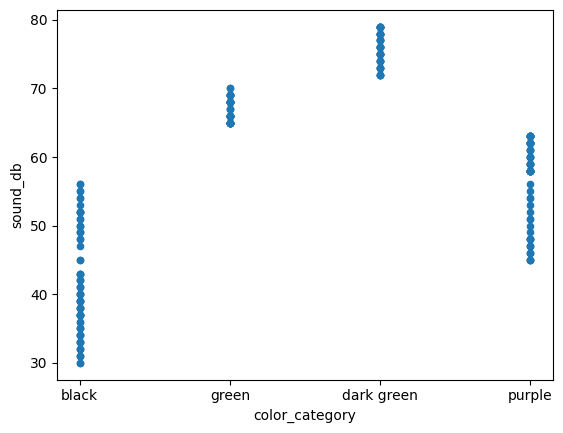

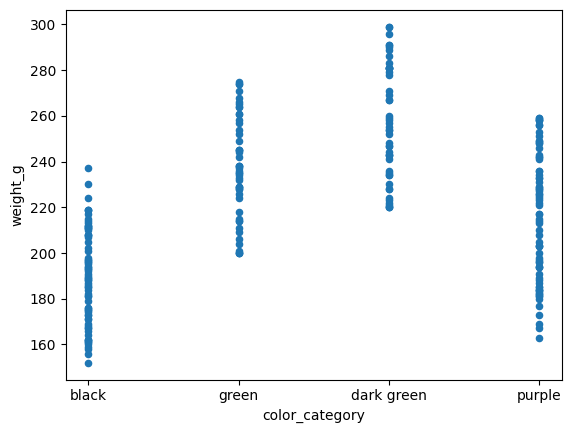

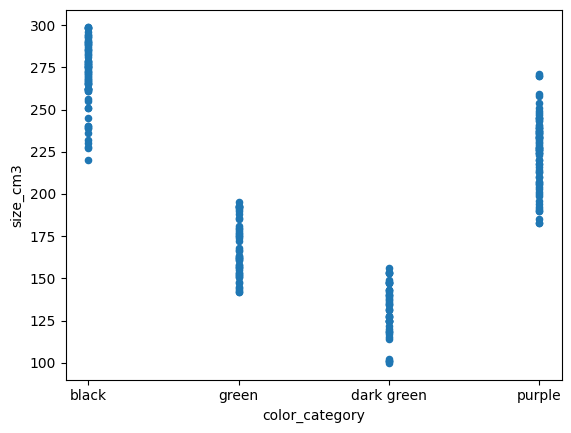

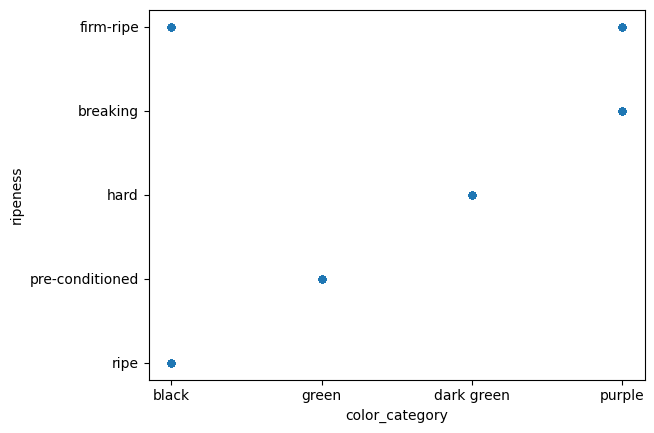

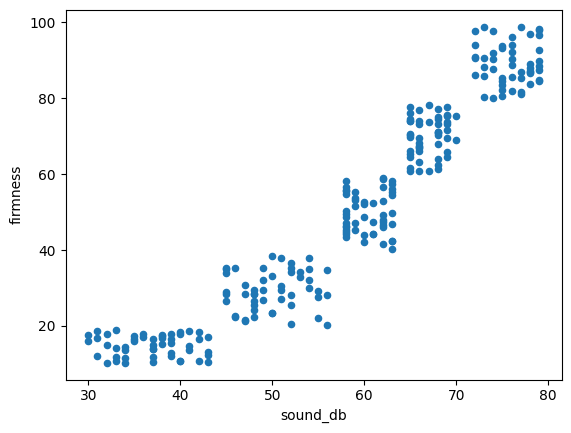

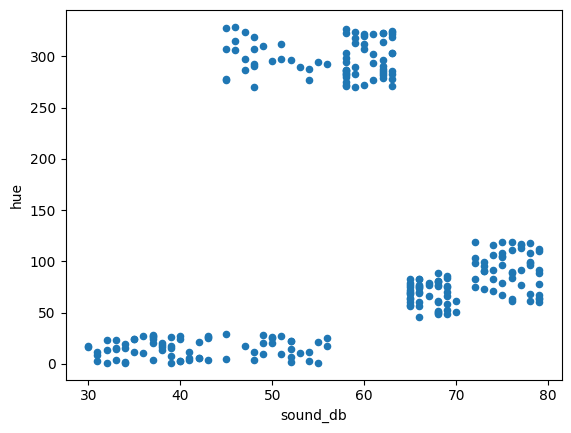

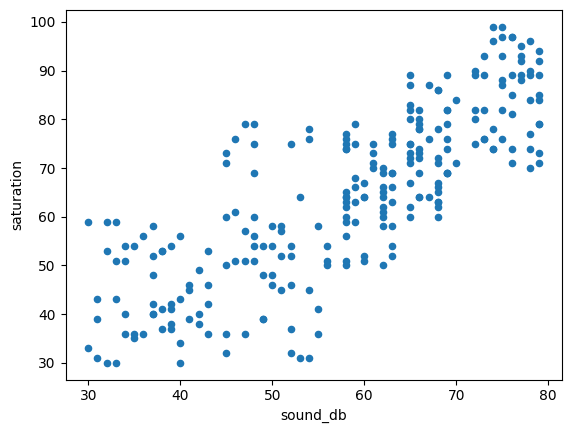

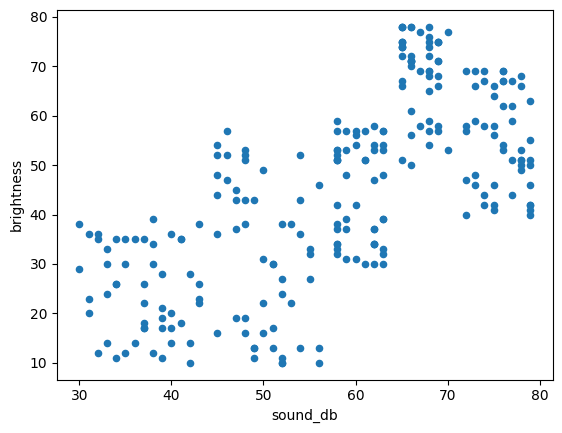

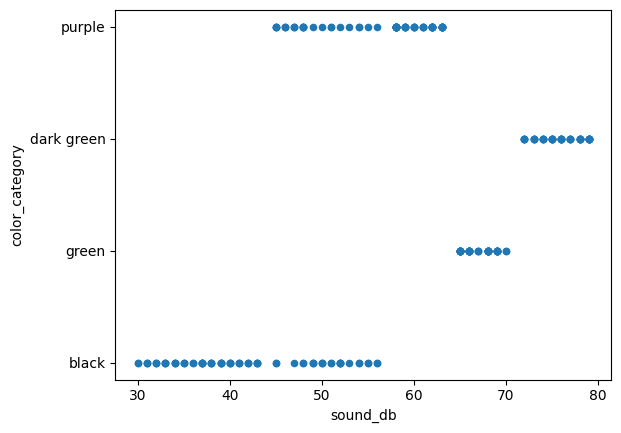

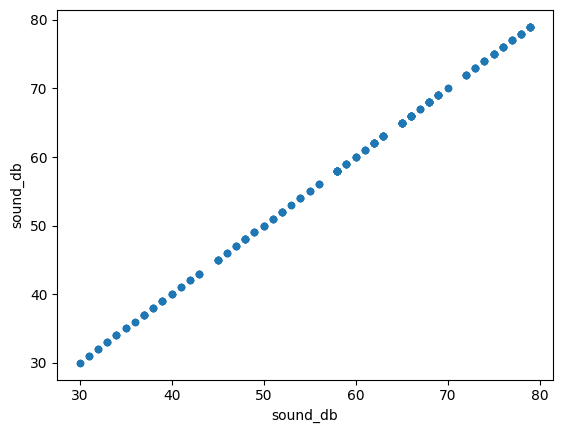

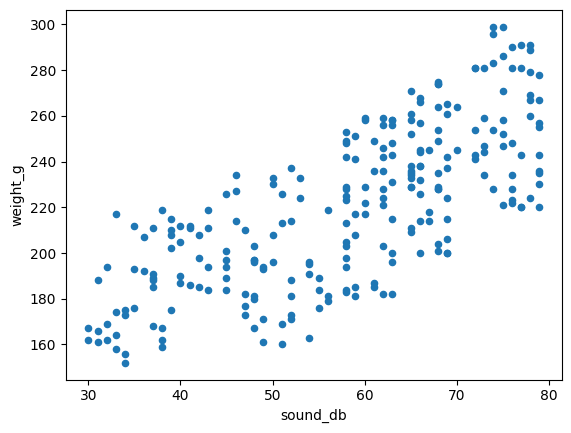

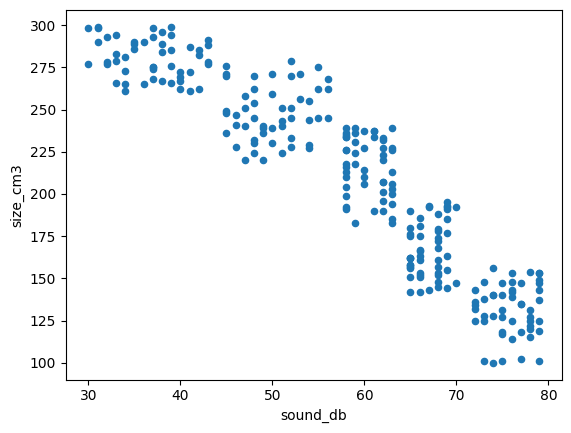

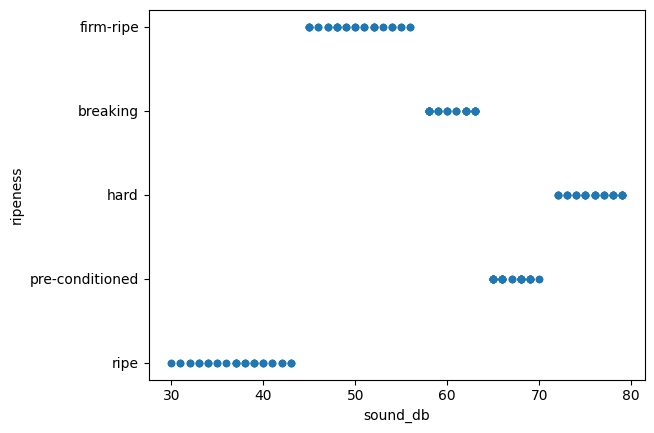

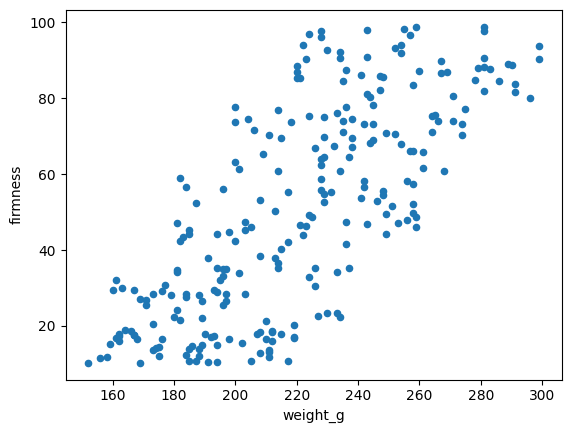

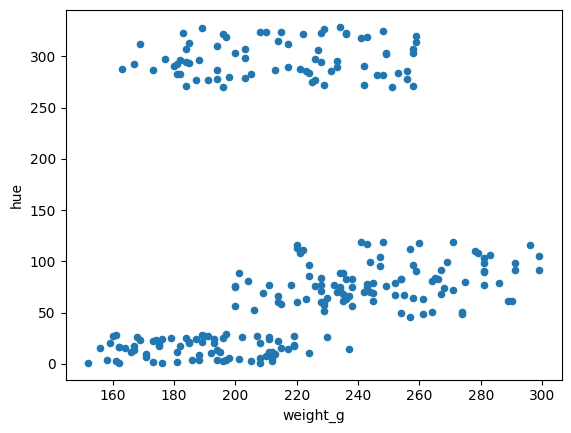

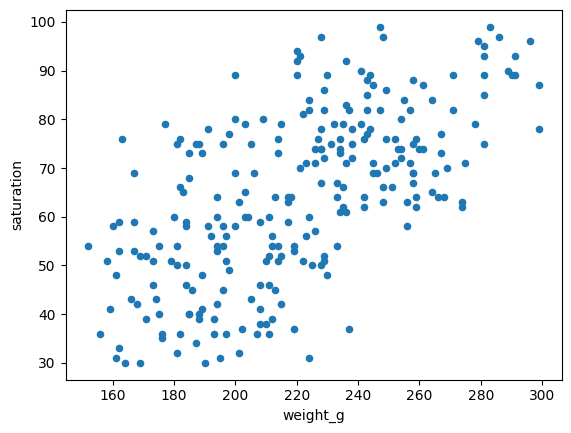

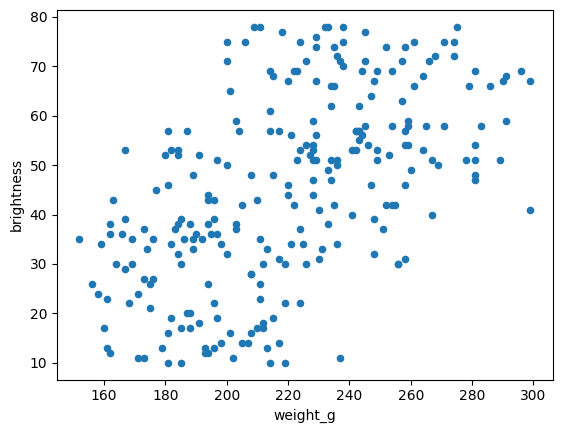

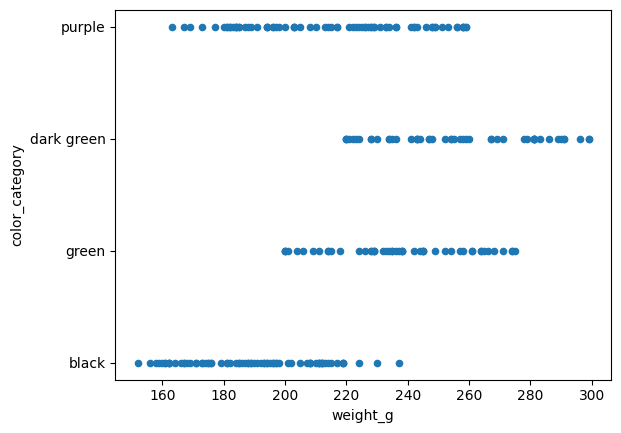

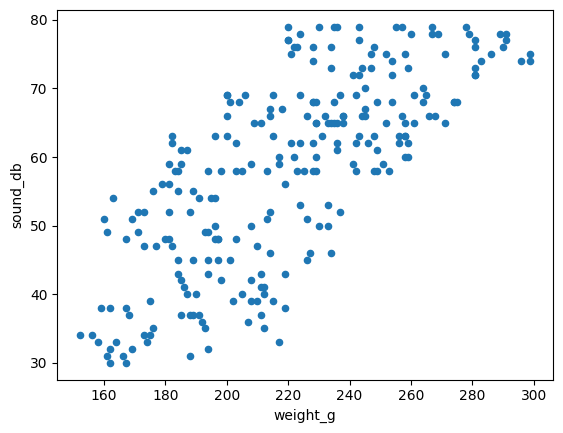

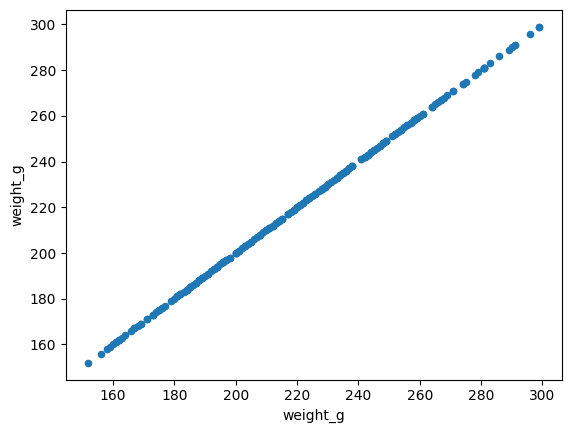

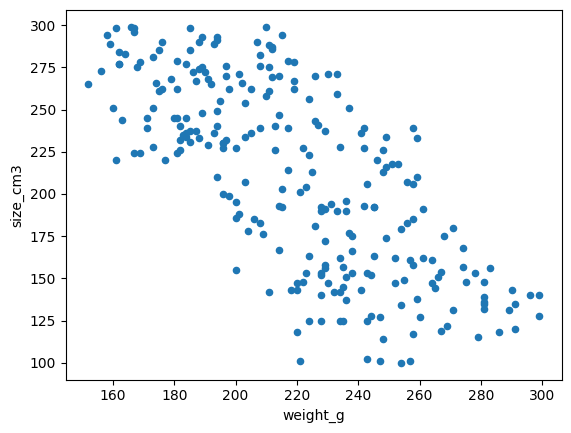

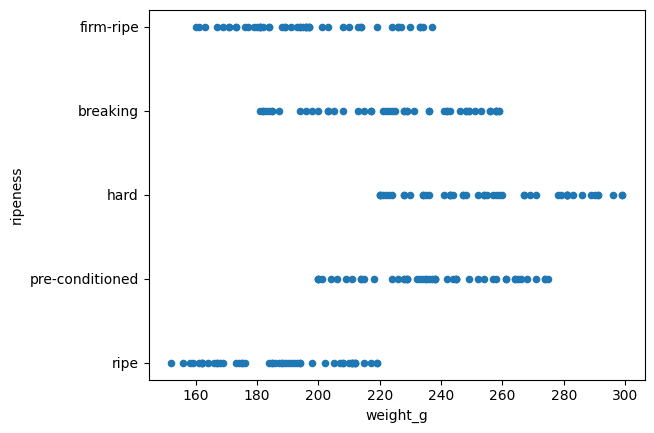

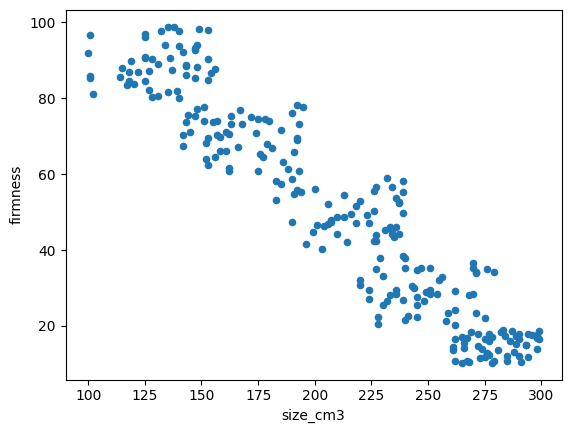

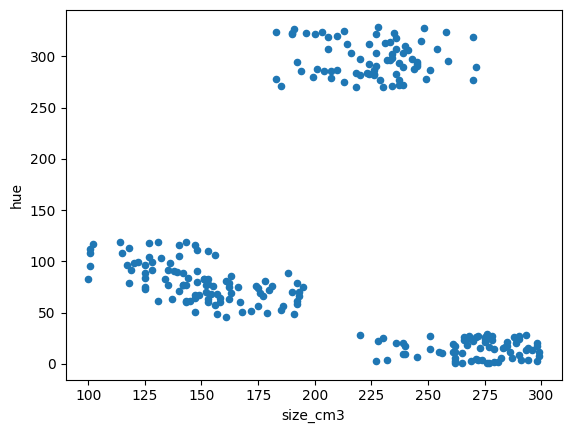

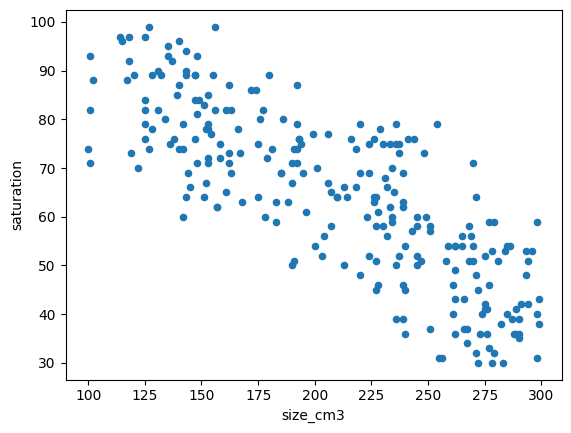

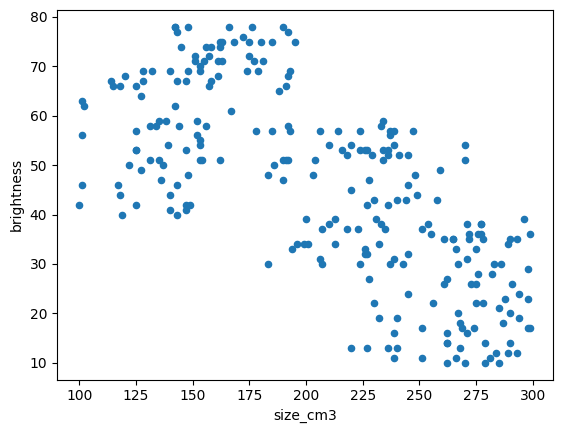

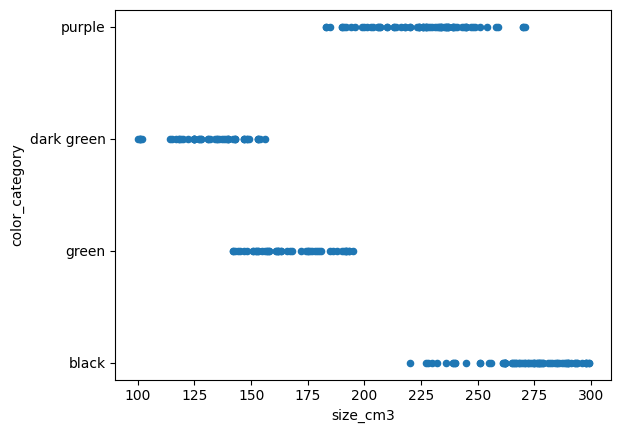

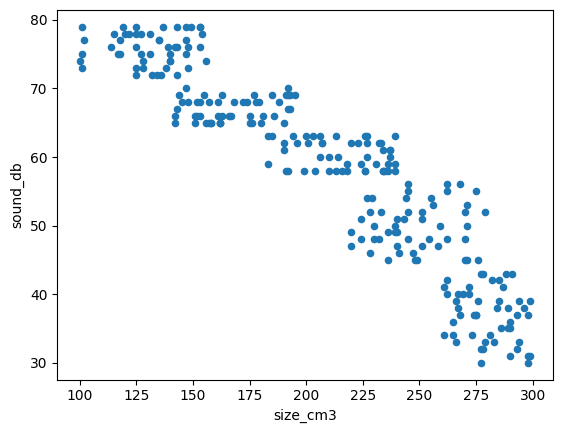

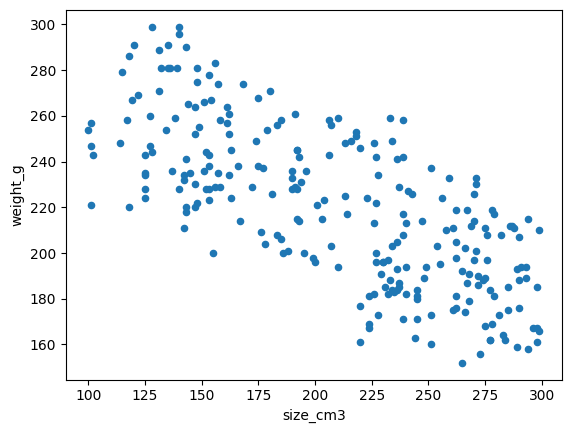

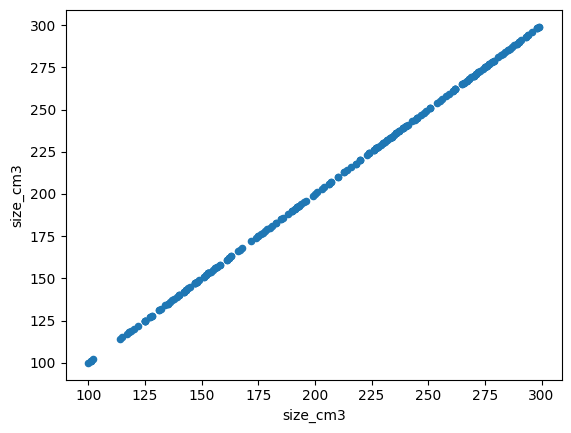

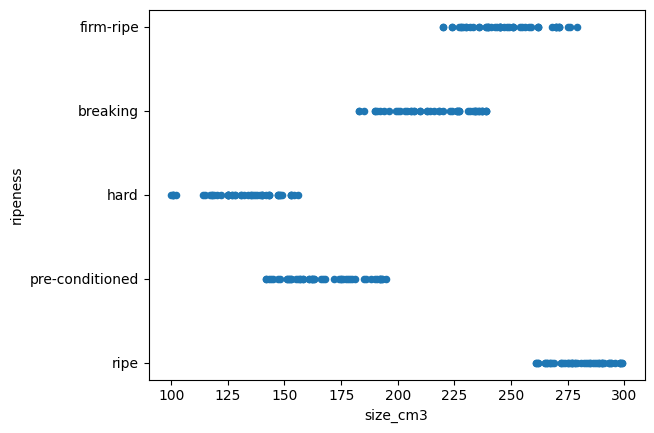

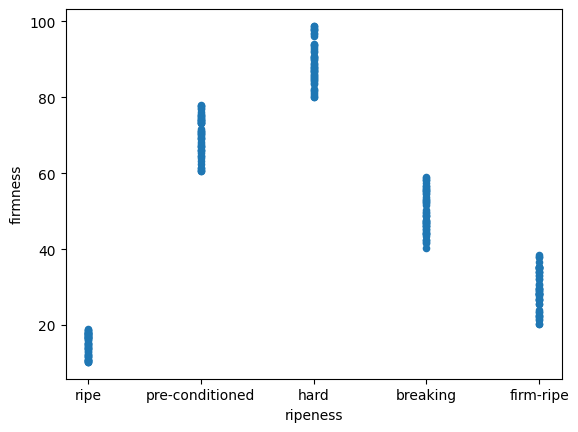

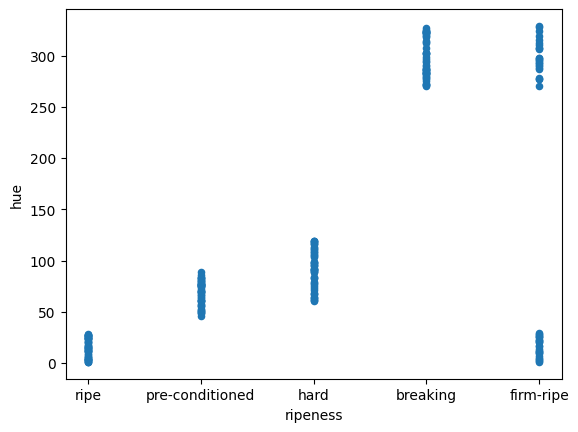

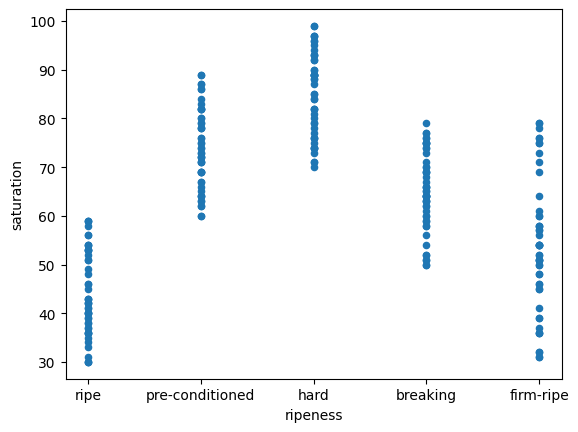

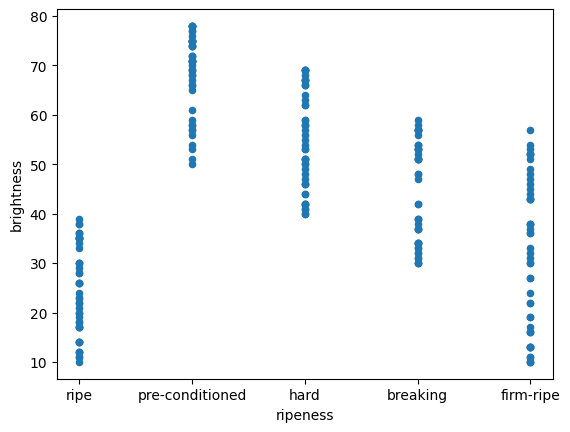

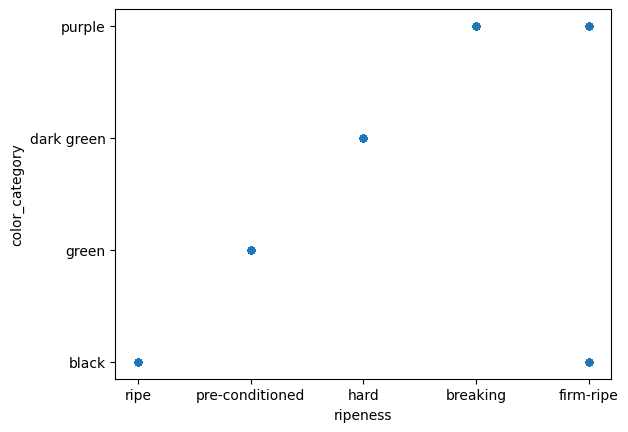

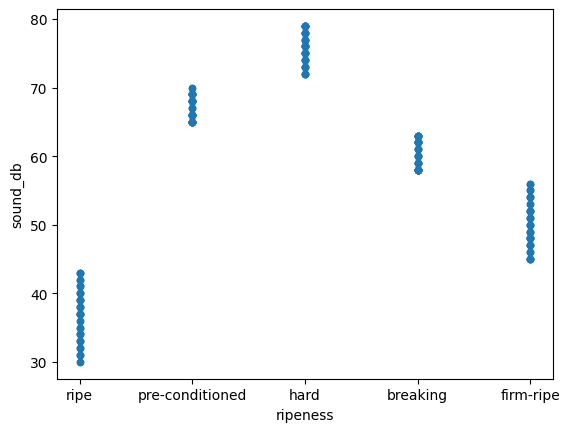

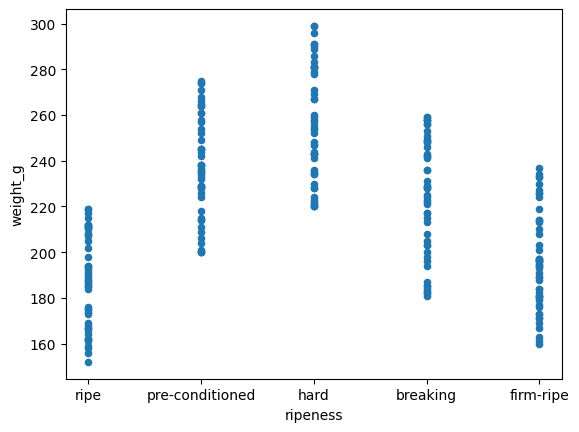

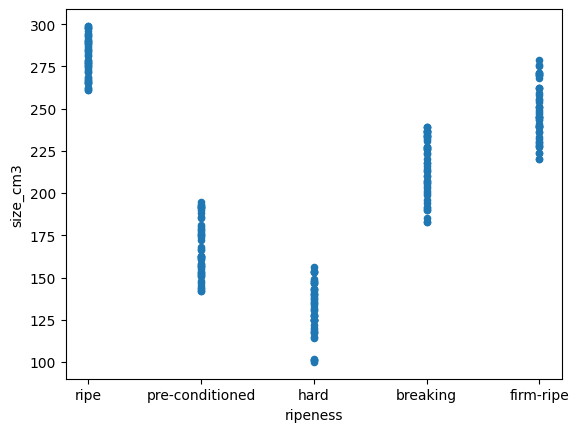

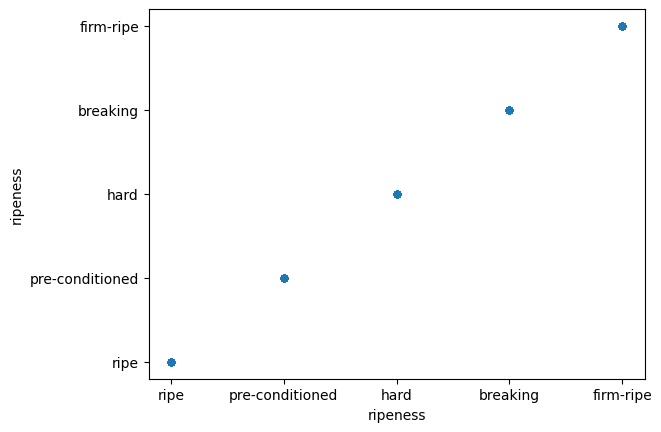

In [39]:
for i in iter(dataframe.columns):
        for j in iter(dataframe.columns):
                dataframe.plot(x=i,y=j,kind="scatter")
                plt.show()

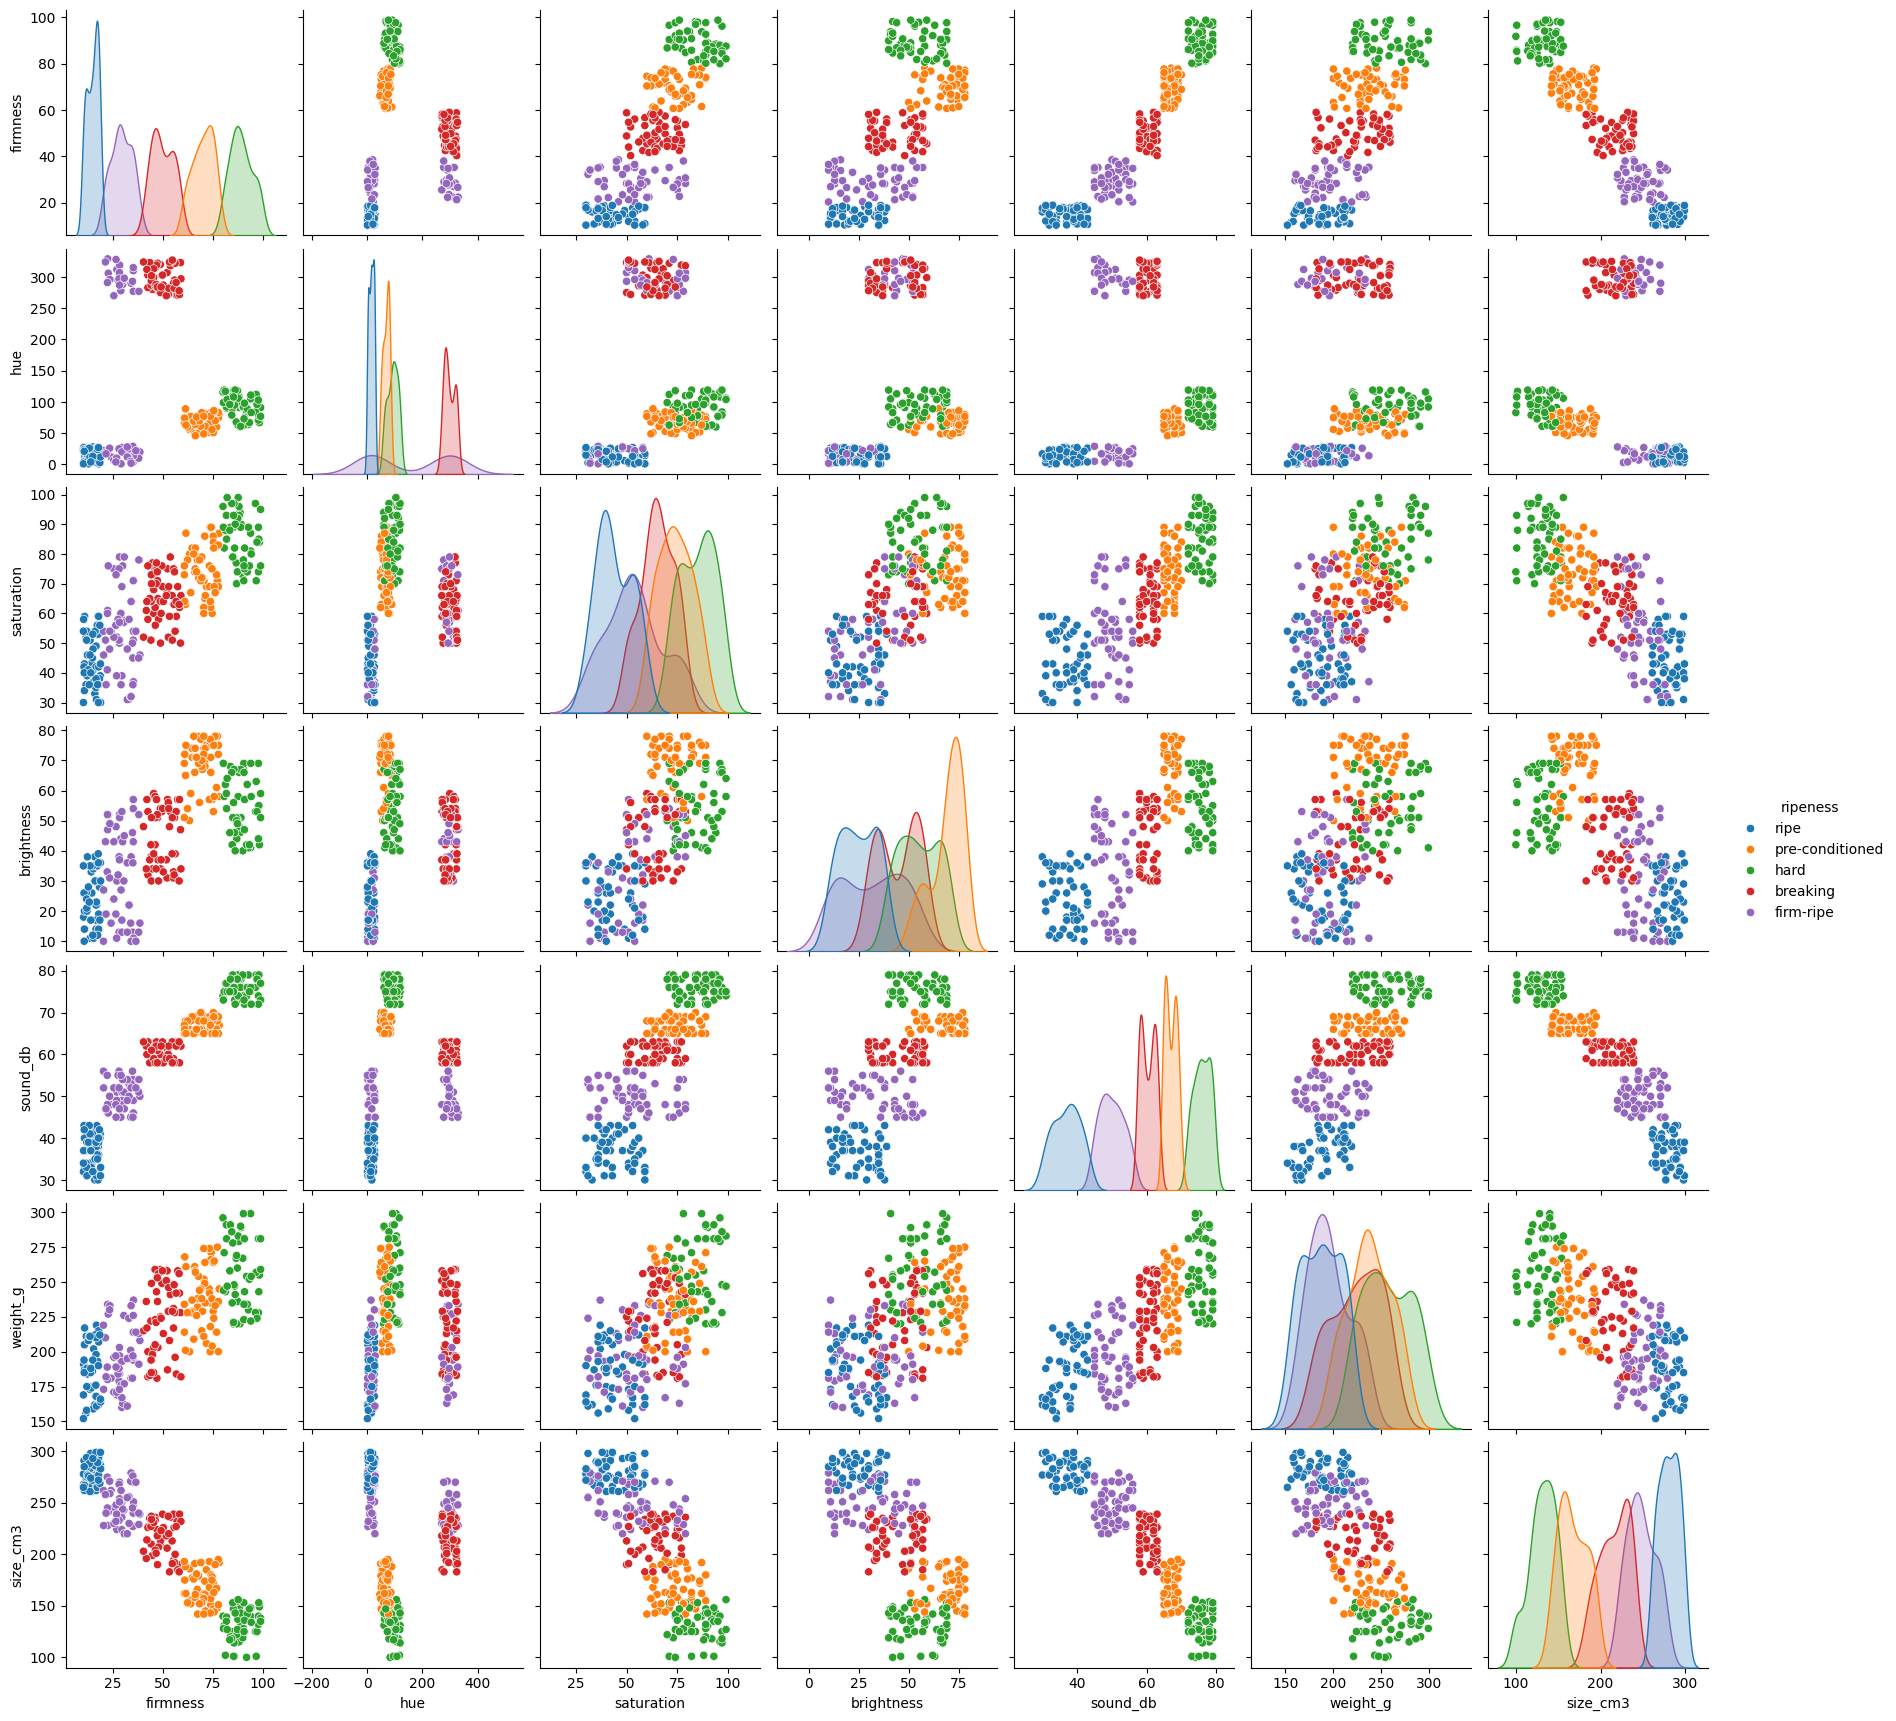

<Axes: >

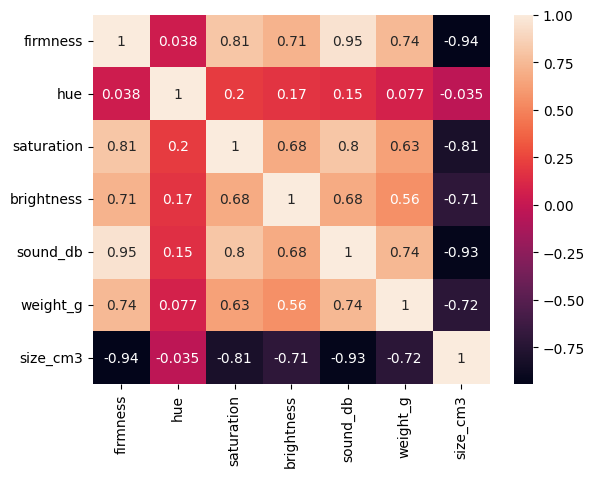

In [48]:
# sns.heatmap(dataframe.corr(),annot=True,cmap="coolwarm")
sns.pairplot(dataframe,hue="ripeness")
plt.show()
dataframe_numeric = dataframe.select_dtypes(include=['number'])
correlation_matrix = dataframe_numeric.corr()
sns.heatmap(correlation_matrix,annot=True)

CLEARNING OBJECTS TO NUMERIC

In [52]:
print(dataframe.dtypes)
print(dataframe["ripeness"].value_counts())
print(dataframe["color_category"].value_counts())

from sklearn.preprocessing import LabelEncoder
encoder_1=LabelEncoder()
encoder_2=LabelEncoder()
dataframe["color_category"]=encoder_1.fit_transform(dataframe["color_category"])
dataframe["ripeness"]=encoder_2.fit_transform(dataframe["ripeness"])
print(encoder_1.classes_)
print(encoder_2.classes_)
print(dataframe.info())

firmness          float64
hue                 int64
saturation          int64
brightness          int64
color_category     object
sound_db            int64
weight_g            int64
size_cm3            int64
ripeness           object
dtype: object
ripeness
ripe               50
pre-conditioned    50
hard               50
breaking           50
firm-ripe          50
Name: count, dtype: int64
color_category
black         75
purple        75
green         50
dark green    50
Name: count, dtype: int64
['black' 'dark green' 'green' 'purple']
['breaking' 'firm-ripe' 'hard' 'pre-conditioned' 'ripe']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 no

DATA PREPROCESSING

In [53]:
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
scaler=MinMaxScaler()
poly=PolynomialFeatures()
X=dataframe.drop(columns=["ripeness"])
y=dataframe["ripeness"]
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)
print(x_train.shape,y_train.shape)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train=poly.fit_transform(x_train)
x_test=poly.transform(x_test)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(187, 8) (187,)
(187, 45) (63, 45) (187,) (63,)


MODEL BUILDING

In [54]:
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier,RandomForestClassifier
svm_model=SVC()
hgbc=HistGradientBoostingClassifier(max_iter=1000)
rfc=RandomForestClassifier(n_jobs=-1,max_depth=10)
svm_model.fit(x_train,y_train)
hgbc.fit(x_train,y_train)
rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=10, n_jobs=-1)

MODEL PREDICTIONS

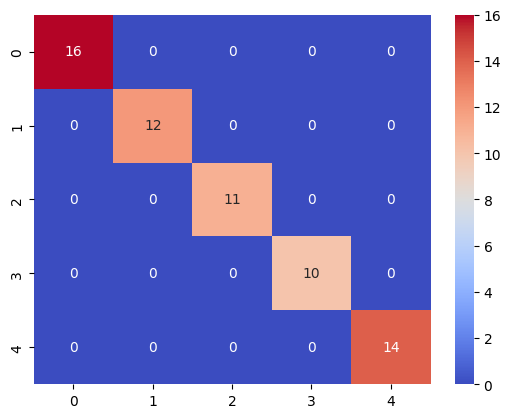

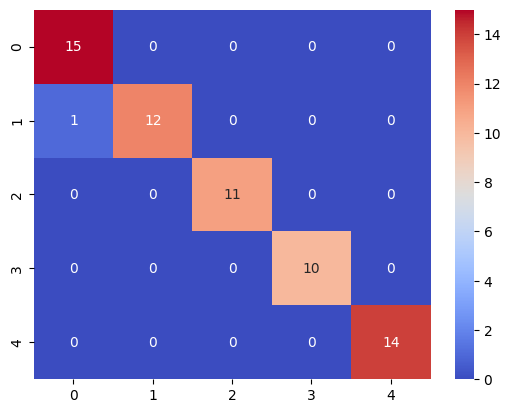

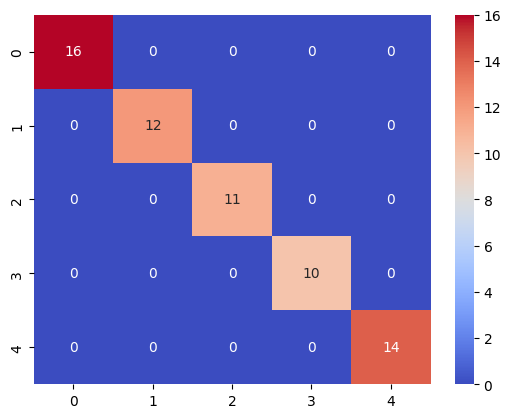

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        14

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        14

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.99        63
weighted avg       0.99      0.98      0.98        63

              precisio

In [55]:
y_preds1=svm_model.predict(x_test)
y_preds2=hgbc.predict(x_test)
y_preds3=rfc.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc1=accuracy_score(y_preds1,y_test)
acc2=accuracy_score(y_preds2,y_test)
acc3=accuracy_score(y_preds3,y_test)
matrix1=confusion_matrix(y_preds1,y_test)
matrix2=confusion_matrix(y_preds2,y_test)
matrix3=confusion_matrix(y_preds3,y_test)
report1=classification_report(y_preds1,y_test)
report2=classification_report(y_preds2,y_test)
report3=classification_report(y_preds3,y_test)


sns.heatmap(matrix1,annot=True,cmap="coolwarm")
plt.show()

sns.heatmap(matrix2,annot=True,cmap="coolwarm")
plt.show()
sns.heatmap(matrix3,annot=True,cmap="coolwarm")
plt.show()
print(report1)
print(report2)
print(report3)


In [56]:
dataframe_new=pd.DataFrame(
        [
                ["SVM",acc1*100],
                ["HistGradientBoostingClassifier",acc2*100],
                ["RandomForestClassifier",acc3*100]
        ],
        columns=["ML ALGORITHM","accuracy_score"]
)
print(dataframe_new)

                     ML ALGORITHM  accuracy_score
0                             SVM      100.000000
1  HistGradientBoostingClassifier       98.412698
2          RandomForestClassifier      100.000000


,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,0,34,175,261,4
5,13.6,2,51,11,0,34,173,281,4
24,16.0,16,33,38,0,30,162,277,4
25,15.4,26,37,11,0,39,202,266,4
26,18.7,6,39,18,0,41,212,287,4
27,10.9,14,59,14,0,33,217,279,4
28,16.6,6,49,14,0,42,198,262,4
37,14.2,23,43,33,0,33,174,266,4
45,15.1,28,48,35,0,37,189,293,4
46,11.6,15,36,26,0,34,156,273,4
